In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"./data/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

Here, the data is split into a development set (data_dev) and a training set (data_train). The pixel values are normalized to a range between 0 and 1 by dividing by 255.

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

- This function intializes the parameters of the neural network: weights (w1, w2) and biases (b1, b2) for the input and hidden layers.

In [7]:
def init_param():
    w1 = np.random.rand(10, 784)-0.5
    b1 = np.random.rand(10, 1)-0.5
    w2 = np.random.rand(10, 10)-0.5
    b2 = np.random.rand(10, 1)-0.5
    return w1, b1, w2, b2

- These functions define the activation functions used in the neural network: ReLU (Rectified Linear Unit) for the hidden layer and softmax for the output layer.

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [9]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

- This function performs forward propagation, computing the activations of each layer sequentially until the final output is obtained

In [10]:
def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X)+b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1)+b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

In [11]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [12]:
def derivative_ReLU(Z):
    return Z>0

- This function computes the gradients of the loss function with respect to the parameters of the network during backpropagation.

In [13]:
def back_prop(z1, a1, z2, a2, w2, Y, X):
    one_hot_Y = one_hot(Y)
    dZ2 = a2-one_hot_Y
    dW2 = 1/m * dZ2.dot(a1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * derivative_ReLU(z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

- This function updates the parameters of the neural network using gradient descent

In [14]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    return W1, b1, W2, b2

In [15]:
def get_predictions(a2):
    return np.argmax(a2, 0)

In [16]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

- This function performs gradient descent to train the neural network, iterating over a specified number of epochs and updating the parameters.

In [17]:
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_param()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 == 0:
            print("iterations: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), Y))
    return w1, b1, w2, b2

In [18]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

iterations:  0
[1 4 6 ... 1 6 4] [5 7 4 ... 2 2 3]
Accuracy:  0.14204878048780487
iterations:  10
[3 4 3 ... 0 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.281780487804878
iterations:  20
[3 4 3 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.3700487804878049
iterations:  30
[3 4 3 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.4473170731707317
iterations:  40
[3 4 3 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.5071219512195122
iterations:  50
[3 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.5518048780487805
iterations:  60
[3 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.5872195121951219
iterations:  70
[2 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.618780487804878
iterations:  80
[2 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.6462926829268293
iterations:  90
[2 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.6712439024390244
iterations:  100
[2 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.690390243902439
iterations:  110
[2 4 4 ... 2 6 3] [5 7 4 ... 2 2 3]
Accuracy:  0.7061951219512195
iterations:  120


- This function makes predictions using the trained neural network

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

- These functions are for testing predictions and calculating accuracy on the validation set

In [20]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


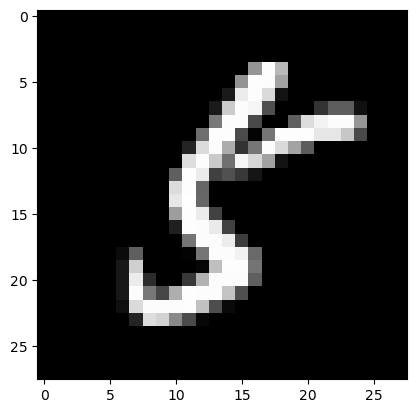

Prediction:  [7]
Label:  7


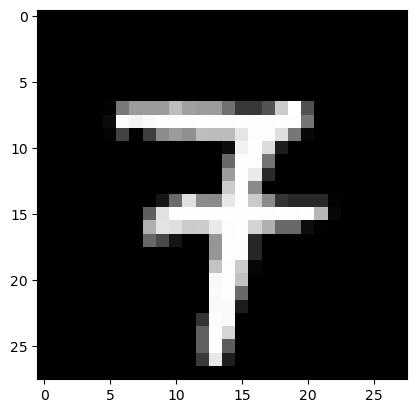

Prediction:  [4]
Label:  4


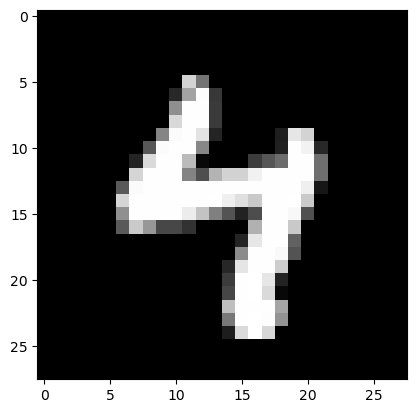

Prediction:  [3]
Label:  3


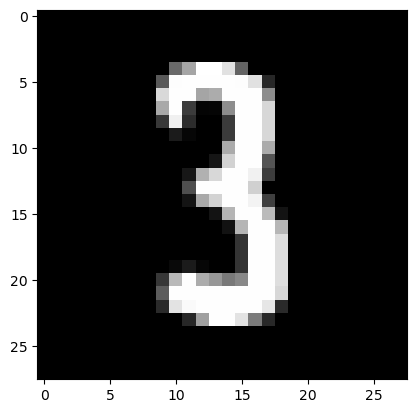

In [21]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)